<a href="https://colab.research.google.com/github/Sangram-1409/AgriSmart/blob/main/Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile
import pandas as pd
import os

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("uber_data")

os.listdir("uber_data")


['uber.csv']

In [ ]:
import os

# List all files inside the extracted folder
print(os.listdir("uber_data"))


['uber.csv']


In [ ]:
df = pd.read_csv("uber_data/uber.csv")
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Extract useful features
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute

# Drop unnecessary columns
df.drop(['key', 'pickup_datetime'], axis=1, inplace=True)

df.head()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47


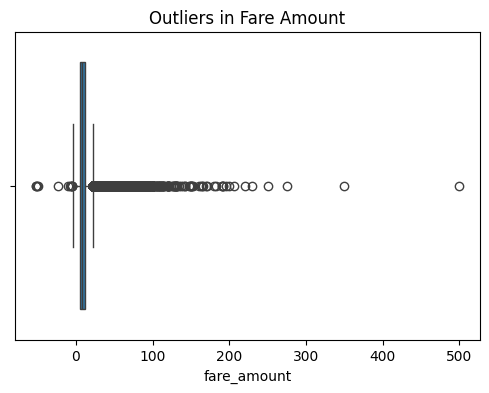

In [ ]:
# Boxplot to check outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare_amount'])
plt.title("Outliers in Fare Amount")
plt.show()

# Remove unrealistic values
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]


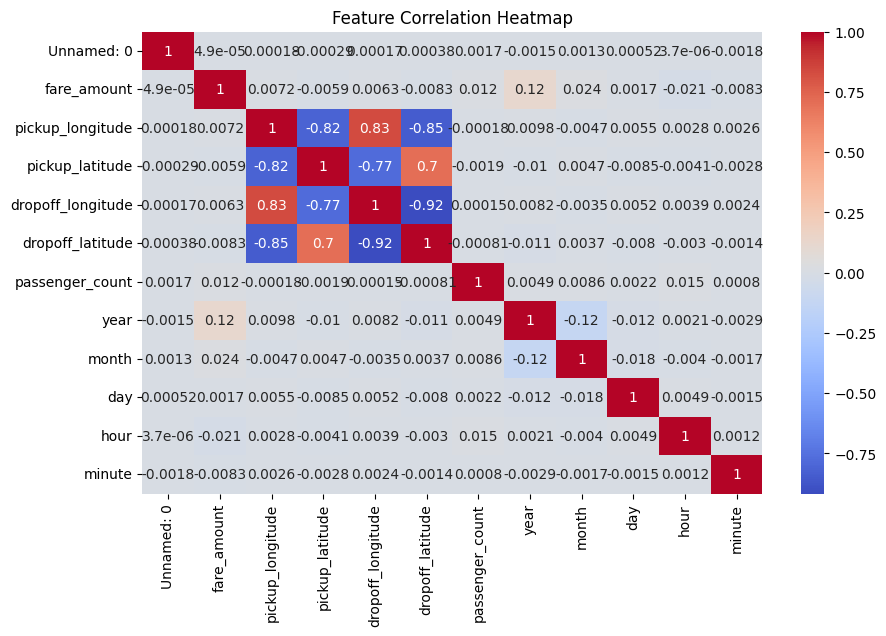

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Linear Regression Performance:
R² Score: 0.0159
RMSE: 9.3797

Random Forest Regression Performance:
R² Score: 0.8210
RMSE: 4.0003



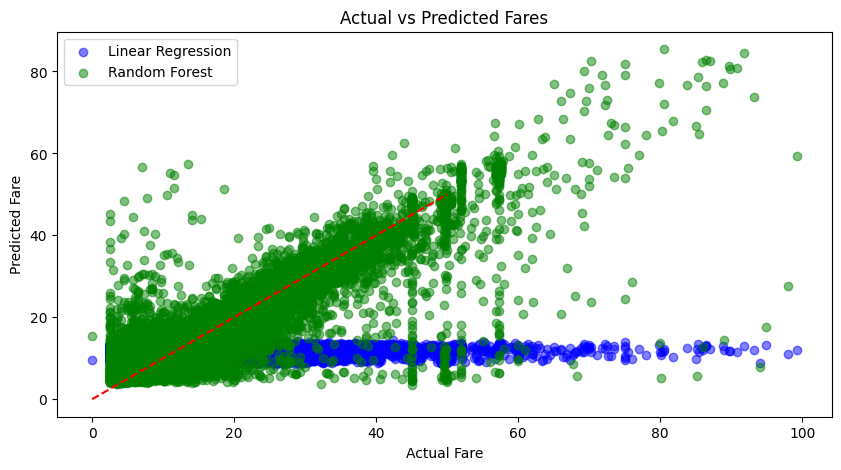

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest', alpha=0.5)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.legend()
plt.title("Actual vs Predicted Fares")
plt.show()
